In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
weight = np.array([2,4,5,3,6,5,7])
price = np.array([35, 60, 20, 50, 50, 55, 60])

In [3]:
df = pd.DataFrame({"weight" : weight, "price" : price})

In [4]:
df

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


### Task 01: Manually compute the slope (M) and y-intercept (C) using Ordinary Least Squares Linear Regression. 

By calculating manually <br>

Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2) <br>
Intercept, c = ȳ - (m * x̄)

In [6]:
x = df['weight']
y = df['price']

In [7]:
mean_weight = np.mean(x)
mean_price = np.mean(y)

In [8]:
mean_weight

4.571428571428571

In [10]:
mean_price

47.142857142857146

In [16]:
dev_x = x - mean_weight
dev_y = y - mean_price

###### Finding the slope

In [12]:
slope_m = np.sum(dev_x * dev_y)/np.sum(dev_x**2)

In [17]:
slope_m

2.620967741935484

###### Finding the intercept

In [14]:
intercept_c = mean_price - (slope_m * mean_weight)

In [15]:
intercept_c

35.16129032258065

###### For weight=6 calculating the price, y = (mx) + c

In [18]:
(slope_m * 6) + intercept_c

50.88709677419355

### Task 02: Compute the residuals for each data point.

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
model.fit(df[['weight']], df[['price']])

LinearRegression()

Text(0.5, 1.0, 'Weight vs Price Plotting')

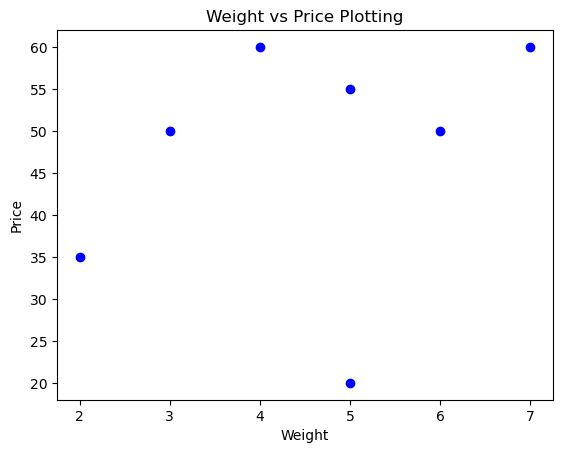

In [21]:
plt.scatter(df['weight'], df['price'], color = 'blue')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight vs Price Plotting')

In [22]:
pred = model.predict(df[['weight']])

In [23]:
pred

array([[40.40322581],
       [45.64516129],
       [48.26612903],
       [43.02419355],
       [50.88709677],
       [48.26612903],
       [53.50806452]])

In [24]:
df['predicted_price'] = pred

In [25]:
df

,weight,price,predicted_price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


Text(0.5, 1.0, 'Weight vs Price Plotting')

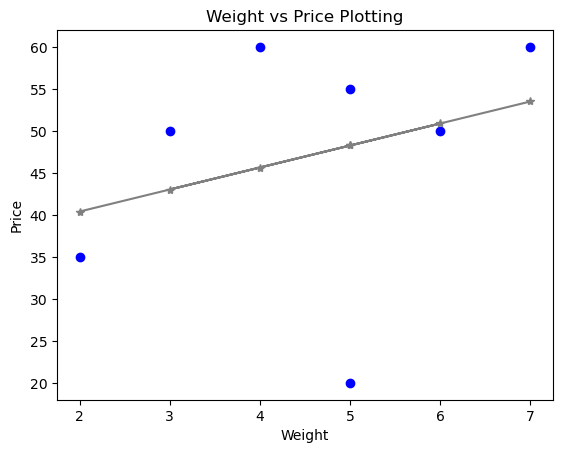

In [26]:
plt.plot(df['weight'], df['predicted_price'], color='grey', marker='*')
plt.scatter(df['weight'], df['price'], color = 'blue')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight vs Price Plotting')

In [27]:
residuals = df['price'] - df['predicted_price']

In [28]:
residuals

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
dtype: float64

In [29]:
df['residuals'] = residuals

In [30]:
df

,weight,price,predicted_price,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


### Task 03: Calculate both the Mean Squared Error (MSE) and Mean Absolute Error (MAE). 

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [32]:
mae = mean_absolute_error(df['price'], df['predicted_price']) # actual(y)-predicted(y^)
mae

9.87327188940092

In [33]:
mse = mean_squared_error(df['price'], df['predicted_price']) # actual(y)-predicted(y^)
mse

167.30990783410135

### Final Task: Generate an Excel file for the given dataset. Utilize Python for all the calculations. 

In [35]:
filename = 'Weight&Price_Data.xlsx'
given_df = df[['weight', 'price']]
given_df.to_excel(filename)